# CSI4142 Assignment 1

1. Andrew Pham - 300226985
2. Kevin Yao - 300295024

In [30]:
# import libraries
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset 1 - Google Play Store Apps

### Description
- Name: Google Play Store Apps
- Author: Lavanya Gupta
- Purpose: Measures the happiness of countries scored according to economic production, social support, etc., over the years (2015-2019)
- Shape: 10841 rows, 13 columns
- Features:
    - `App`: quasi-unique identifier, represents the application name
    - `Category`: categorical feature, represents the category the app belongs to
    - `Rating`: numerical feature, represents the overall user rating of the app (1.0-5.0)
    - `Reviews`: numerical feature, represents the number of user reviews for the app
    - `Size`: quasi-numerical feature, represents the size of the app on disk
    - `Installs`: categorical feature, represents the number of installs the app has, grouped in bins
    - `Type`: categorical feature, represents whether the app is paid or free
    - `Price`: numerical feature, represents the price of the app
    - `Content Rating`: categorical feature, represents the target age group
    - `Genres`: pseudo-categorical, represents the genre(s) an app belongs to. An app can belong to multiple genres.
    - `Last Updated`: numerical, represents the date of the last update to the app
    - `Current Ver`: categorical, represents the current version number of the app
    - `Android Ver`: categorical, represents the minimum Android version required for the app



[https://www.kaggle.com/datasets/lava18/google-play-store-apps](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

### Introduction

The Google Play Store is the largest app marketplace in the Android ecosystem, with over 2.5 billion monthly active users, downloading over 150B apps in the year 2023. (Google, 2026). This represents a massive market of users, but for businesses it is not as easy as publishing an ordinary app to generate large revenues. Over 3 million developers publish applications to Google Play (Google, 2026), representing significant competition in the space. In order to succeed, it is key to understand the marketplace analytically, in order to develop winning strategies for apps. We will analyze the current Google Play landscape, and study the factors that make apps successful on the Play Store.

In [31]:
gp_df = pd.read_csv(
    "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/refs/heads/main/googleplaystore.csv"
)
gp_df.shape

(10841, 13)

In [32]:
print(
    f"Number of rows with duplicate app names: {sum(gp_df.duplicated(subset=['App']))}"
)

print(f"Number of exact duplicates: {sum(gp_df.duplicated())}")

# drop exact duplicates
gp_df = gp_df.drop_duplicates()

print(f"Shape after dropping exact duplicates: {gp_df.shape}")

gp_df.describe(include="all")

Number of rows with duplicate app names: 1181
Number of exact duplicates: 483
Shape after dropping exact duplicates: (10358, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10358,10358,8893.000000,10358,10358,10358,10357,10358,10357,10358,10358,10350,10355
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,593,1526,1488,9591,9592,8382,842,298,1302,2379
mean,NaN,NaN,4.189542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.545452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 1181 records that have a duplicated name, and 483 exact duplicate rows.

# Analysis

### 0. Preliminary cleanup

Text(0.5, 1.0, 'Boxplot of App Ratings')

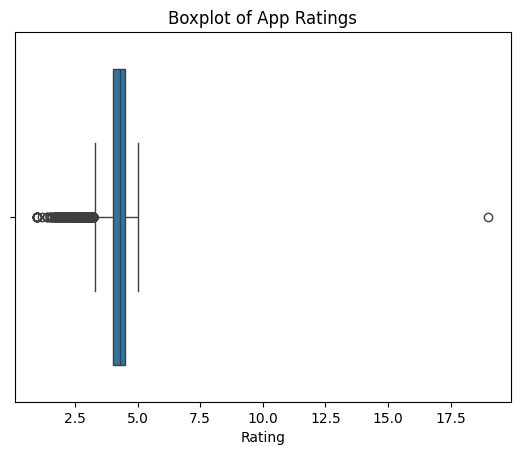

In [33]:
# boxplot the rating of the apps using seaborn
sns.boxplot(x="Rating", data=gp_df)
plt.title("Boxplot of App Ratings")

There seems to be an app with an extreme outlier rating, so we find and drop it.

In [34]:
gp_df[["App", "Category", "Rating", "Reviews"]].sort_values(
    by="Rating", ascending=False
).head(5)

,App,Category,Rating,Reviews
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M
9290,EF Forms,BUSINESS,5.0,2
9293,EF App,BUSINESS,5.0,8
5917,Ra Ga Ba,GAME,5.0,2
9341,EG India,LIFESTYLE,5.0,3


In [35]:
gp_df.drop(gp_df[gp_df["Rating"] > 5].index, inplace=True)
gp_df[["App", "Category", "Rating", "Reviews"]].sort_values(
    by="Rating", ascending=False
).head(5)

,App,Category,Rating,Reviews
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4
4477,Android P Style Icon Pack,PERSONALIZATION,5.0,1
4452,P-Home for KLWP,PERSONALIZATION,5.0,4
10820,Fr. Daoud Lamei,FAMILY,5.0,22
9496,Master E.K,FAMILY,5.0,90


### 1. Boxplot of App Ratings (r1)

Text(0.5, 1.0, 'Boxplot of App Ratings')

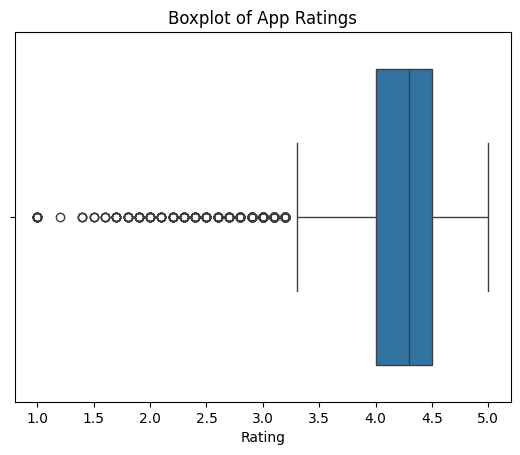

In [36]:
sns.boxplot(x="Rating", data=gp_df)
plt.title("Boxplot of App Ratings")

We see from this boxplot that the median app rating is quite high, at about 4.3. The majority of apps also lie in the ~3.2 - 5.0 range, with the apps with ratings falling below that range being outliers. 

Insight: The majority of apps published to the Play Store are quite well received.

### 2. Countplot of Apps by Category (r2)

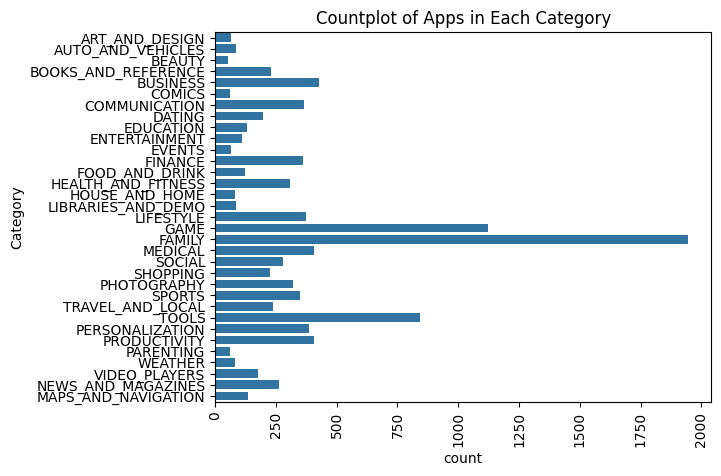

In [37]:
# countplot for the number of apps in each category
sns.countplot(y="Category", data=gp_df, orient="h")
plt.title("Countplot of Apps in Each Category")
plt.xticks(rotation=90)
plt.show()

We can see from this graph that family apps are by far the most popular type of app, followed by games and tools. The market share for these categories is much higher than the rest, but there will most certainly be more competitors.

Insight: The most popular app types are Family, Games and Tools, which should be targets for apps to gain the largest userbase.

### 3. Countplot of App Sizes, grouped into bins (r3)

In [38]:
# find unique last letters for the Size column
print(gp_df["Size"].str[-1].unique())

# drop instances that are nan, or whose size is 'Varies with device'
size_comp_df = gp_df[gp_df["Size"] != "Varies with device"]

# convert size column to numeric (standardize in megabytes, so divide by 1000 if k)
mask_k = size_comp_df["Size"].str.endswith("k", na=False)

size_comp_df["Size_MB"] = size_comp_df["Size"].str.replace("M", "", regex=False)
size_comp_df["Size_MB"] = size_comp_df["Size_MB"].str.replace("k", "", regex=False)

# print(size_comp_df["Size_MB"])
size_comp_df["Size_MB"] = pd.to_numeric(size_comp_df["Size_MB"], errors="coerce")
# print(size_comp_df.loc[mask_k, "Size_MB"])
size_comp_df.loc[mask_k, "Size_MB"] = size_comp_df.loc[mask_k, "Size_MB"] / 1000

size_comp_df[["Size", "Size_MB"]].loc[mask_k]
gp_df["Size_MB"] = size_comp_df["Size_MB"]

<StringArray>
['M', 'e', 'k']
Length: 3, dtype: str


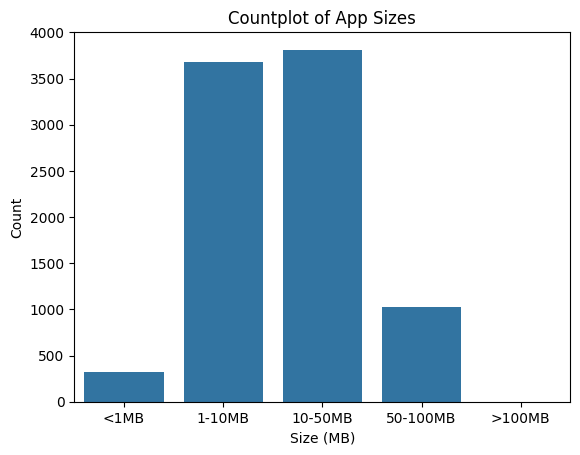

In [39]:
# group countplot of apps based on size

# bin the Size_MB column into the following bins: <1, 1-10, 10-100, 100-1000, 1000-10000, 10000-100000, >100000
size_comp_df["Size_Bin"] = pd.cut(
    size_comp_df["Size_MB"],
    bins=[0, 1, 10, 50, 100, float("inf")],
    labels=["<1MB", "1-10MB", "10-50MB", "50-100MB", ">100MB"],
)

# plot the countplot of the Size_Bin column
sns.countplot(x="Size_Bin", data=size_comp_df)
plt.title("Countplot of App Sizes")
plt.xlabel("Size (MB)")
plt.ylabel("Count")
plt.show()

For this graph, we transformed each app's Size into megabytes, then grouped them into bins. Most applications fall in the range of 1-50MB, with almost none over 100MB. 

Insight: This shows a good practice would be to limit application size by dynamically fetching content or other large static assets over the network, through CDNs or servers.

### 4. Boxplot of Rating vs Installs (r4)

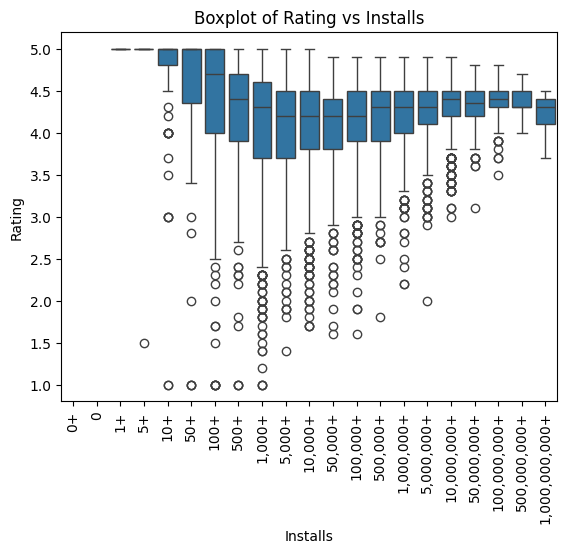

In [40]:
# bivariate analysis between rating and install, order x axis by installs
from matplotlib.ticker import StrMethodFormatter

#  take out unique installs labels, sort them (numerically, string sort won't work properly)
installs_labels = gp_df["Installs"].unique()
installs_labels_numeric_map = {
    label: int(label.replace(",", "").replace("+", "")) for label in installs_labels
}

# add new column to sort the df on by the numeric installs
gp_df["Installs_numeric"] = gp_df["Installs"].map(installs_labels_numeric_map)

gp_df.sort_values(by="Installs_numeric", inplace=True)

# get the order of the installs labels as they appear in the sorted df
order = gp_df["Installs"].unique()

plot = sns.boxplot(x="Installs", y="Rating", data=gp_df, order=order)
plt.title("Boxplot of Rating vs Installs")
plt.xlabel("Installs")
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.show()

As we can see from the above graph, apps with fewer installs tend to have a high rating, since there are few users and the data is likely skewed by reviews from the developer(s) or people whom they know. As the install count increases, the the median and tail whisker ratings of the apps drops, before rising up again. This suggests there's some zone where once enough people try your app, you will face more lower ratings, but apps that are able to break through and gain popularity tend to do so since they are well-made, so the median rating increases. We can also see the variance in average ratings stabilizes a lot as the apps get more popular, so more popular apps on average have higher ratings then less popular ones.

Insight: App ratings initially decline as install counts grow, likely due to more critical user feedback, but highly popular apps tend to recover with higher and more stable ratings, suggesting that only well-made apps become popular.

### 5. Countplot of Apps based on Installs vs Type (Paid or Free) (r5)

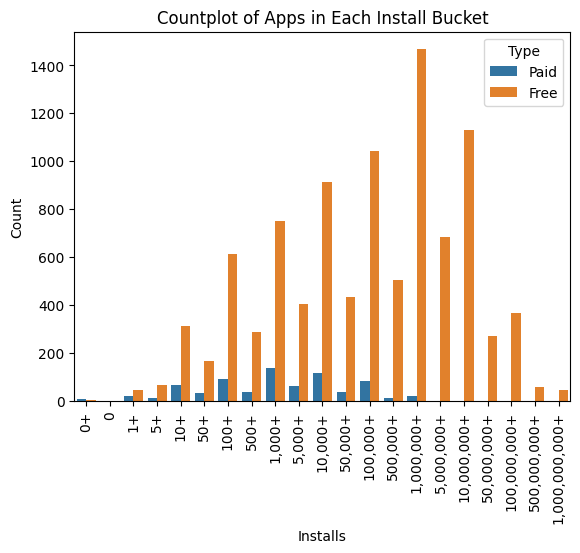

In [41]:
# sort the df by installs
sns.countplot(x="Installs", data=gp_df, hue="Type")
plt.title("Countplot of Apps in Each Install Bucket")
plt.xlabel("Installs")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

As we can see, the overwhelming majority of apps on the Play store are free. For paid apps, we can see there are many paid apps that have very few installs. In these cases, it is likely that the perceived value of the app does not match the cost of the app. The most popular apps (in terms of installs) are all free. 

Insight: A good approach might be to go for virality/low cost of entry for the consumer, then monetize with freemium features.

### 6. Countplot of Apps by Category and Install Bucket (r6)

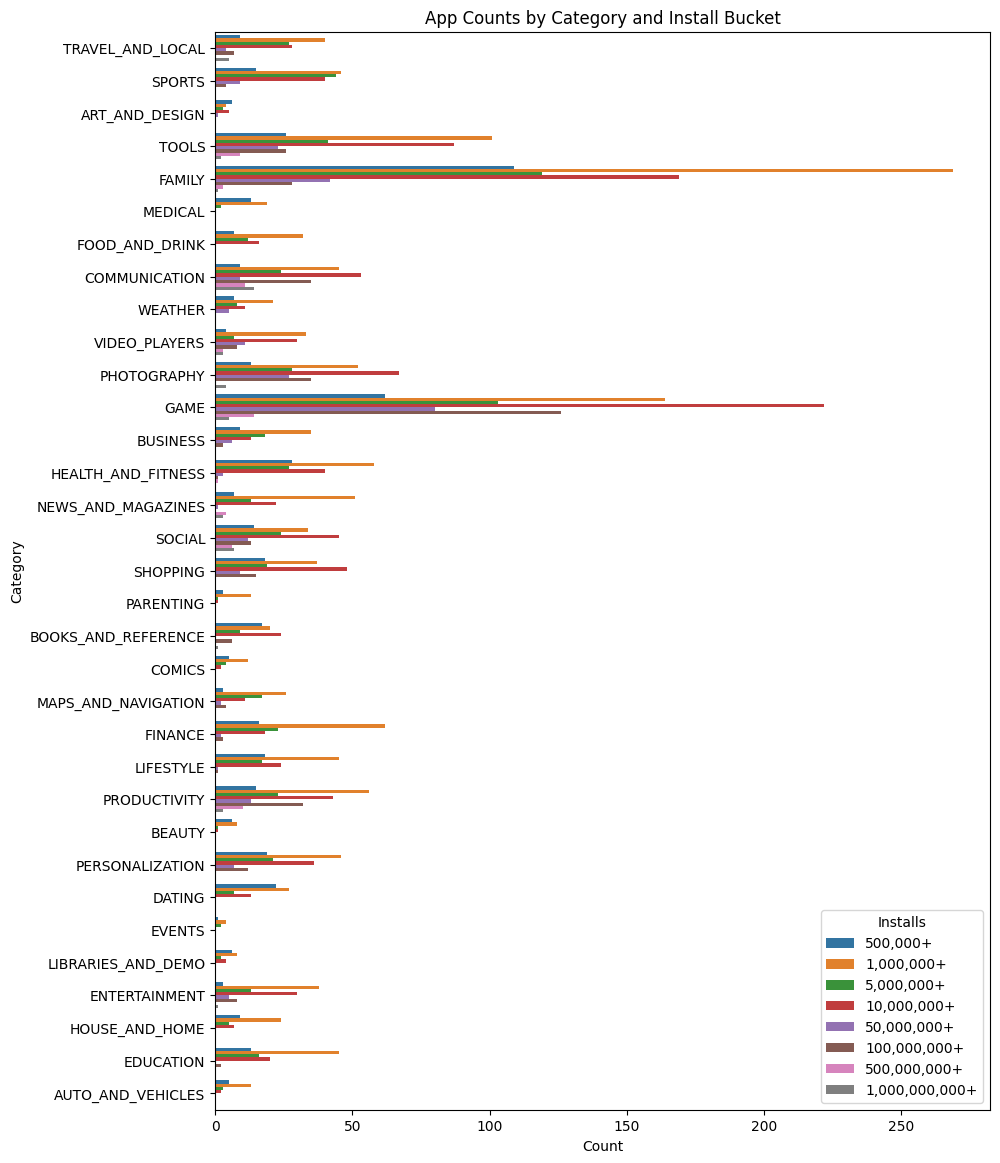

In [42]:
# plot installs vs category
category_countplot_df = gp_df.copy()
# drop all apps with installs less than 10 000
category_countplot_df = category_countplot_df[
    category_countplot_df["Installs_numeric"] >= 500_000
]

# order bars in graph by install count for readability
install_order = [
    "500,000+",
    "1,000,000+",
    "5,000,000+",
    "10,000,000+",
    "50,000,000+",
    "100,000,000+",
    "500,000,000+",
    "1,000,000,000+",
]

# inspiration for setting order of bars: https://stackoverflow.com/questions/54726576/how-to-set-the-countplot-order

plt.figure(figsize=(10, 14))
sns.countplot(
    data=category_countplot_df, y="Category", hue="Installs", hue_order=install_order
)
plt.title("App Counts by Category and Install Bucket")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

Insight: The categories with the most viral apps (1B+ installs) are communication, social and game apps. 

### 7. Scatterplot of Reviews vs Rating (r8)

In [43]:
# reviews are strings by default, so we need to convert them to numeric
gp_df["Reviews_numeric"] = gp_df["Reviews"].astype(int)

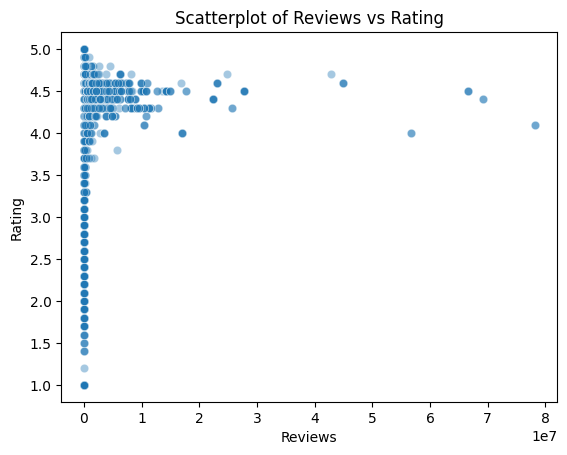

In [44]:
# scatterplot reviews vs rating
sns.scatterplot(x="Reviews_numeric", y="Rating", data=gp_df, alpha=0.4)
plt.title("Scatterplot of Reviews vs Rating")
plt.xlabel("Reviews")
plt.ylabel("Rating")
plt.show()

Insight: Review scores fluctuate greatly with smaller samples, then gradually stabilize as the sample size of reviews becomes bigger.

### 8. Countplot of Content Rating Distribution Across Review Count Bins (r7)

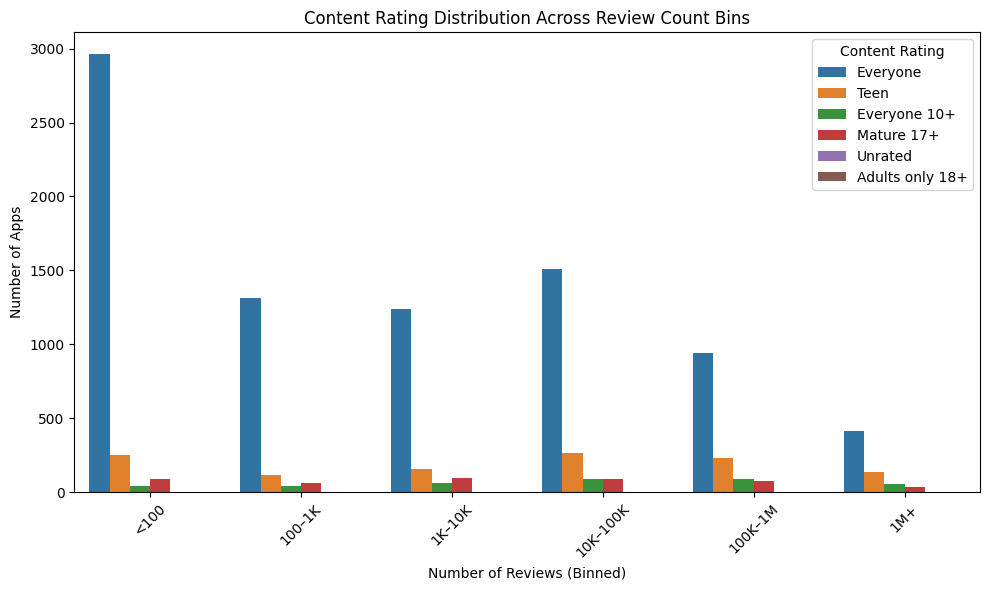

In [45]:
gp_df["Reviews_Bin"] = pd.cut(
    gp_df["Reviews_numeric"],
    bins=[0, 100, 1_000, 10_000, 100_000, 1_000_000, float("inf")],
    labels=["<100", "100–1K", "1K–10K", "10K–100K", "100K–1M", "1M+"],
    include_lowest=True,
)

plt.figure(figsize=(10, 6))

sns.countplot(data=gp_df, x="Reviews_Bin", hue="Content Rating")

plt.title("Content Rating Distribution Across Review Count Bins")
plt.xlabel("Number of Reviews (Binned)")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight: The overwhelming majority of apps are rated for everyone and the number of apps in each bin of review counts varies a lot, but it is much more stable for Teen, Everyone 10+ and Mature 17+. Targeted apps seem to have better chances of thriving compared to 'Everyone' rated apps, likely because there 

### 9. Distribution of Sizes (r1)

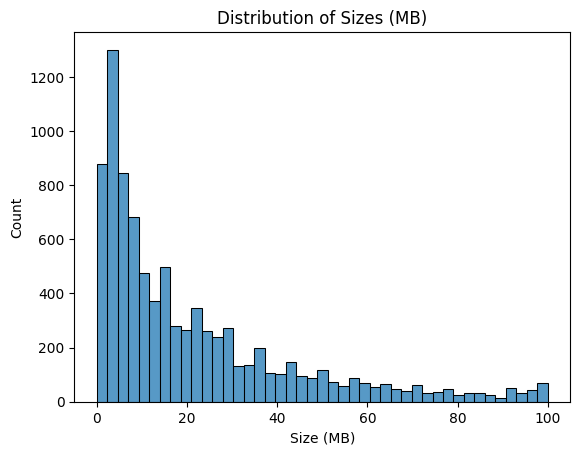

In [46]:
sns.histplot(x="Size_MB", data=gp_df)
plt.title("Distribution of Sizes (MB)")
plt.xlabel("Size (MB)")
plt.ylabel("Count")
plt.show()

Insight: The distribution of sizes isn't a uniform normal distribution. It is heavily skewed towards smaller apps, and the majority are less than ~15MB

### 10. Scatterplot of Rating vs Price (r8))

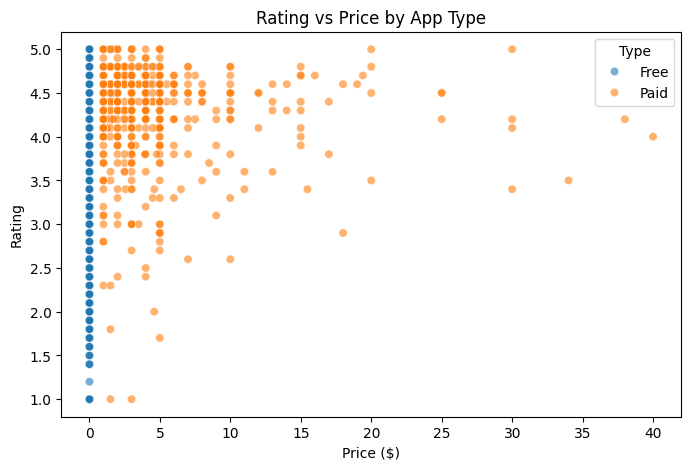

In [47]:
gp_df["Price_numeric"] = gp_df["Price"].str.replace("$", "").astype(float)
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=gp_df[gp_df["Price_numeric"] < 50],  # drop  extreme outliers
    x="Price_numeric",
    y="Rating",
    hue="Type",
    alpha=0.6,
)
plt.title("Rating vs Price by App Type")
plt.xlabel("Price ($)")
plt.ylabel("Rating")
plt.show()

Insight: More expensive apps tend to have higher ratings and therefore a higher perceived quality.

### References

- Google. *How Google Play Works*. (2026) https://google.play/howplayworks/.
- StackOverflow *How to set the countplot order*. (2019) https://stackoverflow.com/questions/54726576/how-to-set-the-countplot-order 


## Dataset 2 - German Credit Risk

### Description
- Name: German Credit Risk
- Author: UCI Machine Learning Repository
- Purpose: Financial dataset used for credit risk assessment and credit scoring
- Shape: 1000 rows, 10 columns
- Features:
    - `Age`: numerical feature representing the applicant’s age
    - `Sex`: categorical feature representing the applicant’s gender
    - `Job`: ordinal numerical feature representing the applicant’s employment category
    - `Housing`: categorical feature representing the applicant’s housing status (own, rent, free)
    - `Saving Accounts`: categorical feature representing the applicant’s savings level
    - `Checking Account`: categorical feature representing the applicant’s checking account status
    - `Credit Amount`: numerical feature representing the loan amount requested
    - `Duration`: numerical feature representing the loan duration in months
    - `Purpose`: categorical feature representing the purpose of the loan



[https://www.kaggle.com/datasets/uciml/german-credit](https://www.kaggle.com/datasets/uciml/german-credit)

### Introduction

Credit risk assessment is a key challenge in banking, requiring accurate evaluation of borrowers to distinguish between good and bad credit risks. The German Credit Risk dataset contains information on 1000 individuals who applied for bank credit, each classified based on a variety of factors such as demographic, employment, housing, and financial attributes. By analyzing this dataset, we aim to identify the factors that most strongly influence credit risk classification and gain insight into data-driven lending decisions.

In [48]:
# Set the path to the file you'd like to load
file_path = "german_credit_data.csv"

# Load the latest version
gc_df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "uciml/german-credit",
  file_path,
)

gc_df.shape

(1000, 10)

# Analysis

### 0. Preliminary cleanup

In [49]:
print(f"Number of exact duplicates: {sum(gc_df.duplicated())}")

# drop exact duplicates
gc_df = gc_df.drop_duplicates()

print(f"Shape after dropping exact duplicates: {gc_df.shape}")

gc_df.describe(include="all")

Number of exact duplicates: 0
Shape after dropping exact duplicates: (1000, 10)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN


There's no duplicates, so nothing to clean up.

### 1. Boxplot of Customer Ages (r1)

Text(0.5, 1.0, 'Boxplot of Customer Ages')

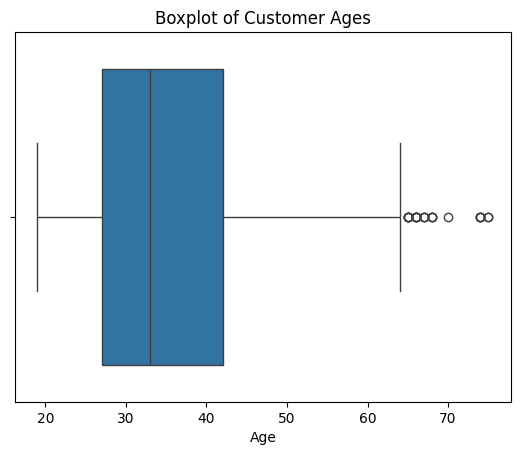

In [50]:
# boxplot the rating of the apps using seaborn
sns.boxplot(x="Age", data=gc_df)
plt.title("Boxplot of Customer Ages")

Insight: From this boxplot, we can see that the vast majority of customers who take out a loan are between 30-40 years old, with a few outliers being in their mid 60s to mid 70s. From this, we can tell most people taking out loans are middle-aged. Next we can check why they're taking out these loans.


### 2. Countplot of Purpose (r2)

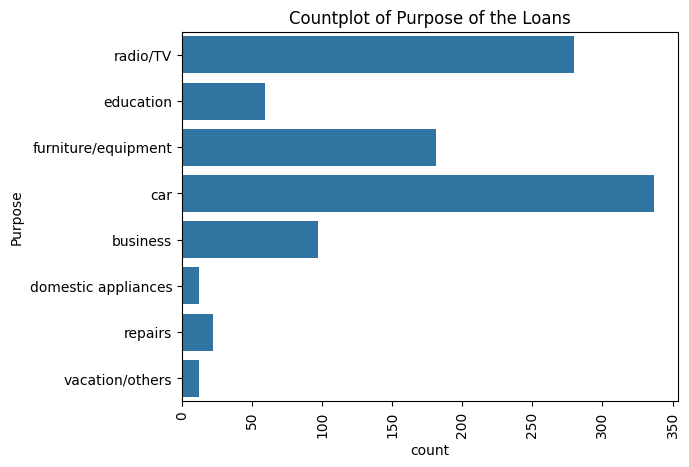

In [51]:
# countplot for the purpose of the loans
sns.countplot(y="Purpose", data=gc_df, orient="h")
plt.title("Countplot of Purpose of the Loans")
plt.xticks(rotation=90)
plt.show()

Insight: From this we can see that most people take out a loan for a car or a radio/TV. This correlates with the age distribution, as most people around those ages need a car for work and easier transportation, while a radio/TV makes for great entertainment after finishing work or relaxing in general. 


### 3. Countplot of Credit Amounts, grouped into bins (r3)

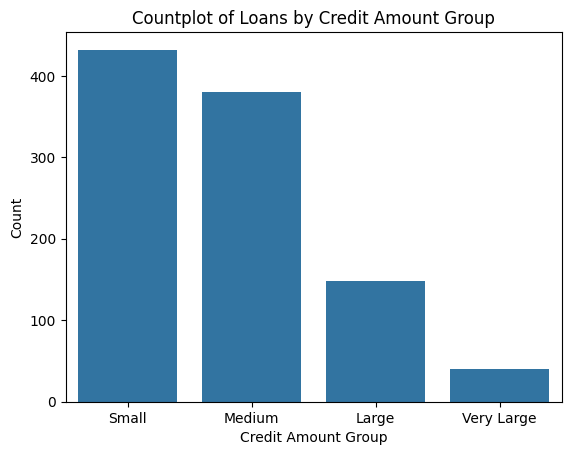

In [52]:
# group Credit amount into loan size categories
gc_df["Credit_Amount_Group"] = pd.cut(
    gc_df["Credit amount"],
    bins=[0, 2000, 5000, 10000, float("inf")],
    labels=["Small", "Medium", "Large", "Very Large"]
)

# grouped countplot
sns.countplot(x="Credit_Amount_Group", data=gc_df)
plt.title("Countplot of Loans by Credit Amount Group")
plt.xlabel("Credit Amount Group")
plt.ylabel("Count")
plt.show()


Insight: The countplot shows that most loans fall into the small and medium credit amount groups, while large and very large loans are much less common. This suggests that most borrowers are taking relatively modest loans rather than borrowing large amounts. This matches the loan purposes distribution we saw earlier in the dataset, such as cars, radio/tv, and furniture, which usually do not require very large credit amounts.

### 4. Boxplot of Job vs Credit Amount (r4)

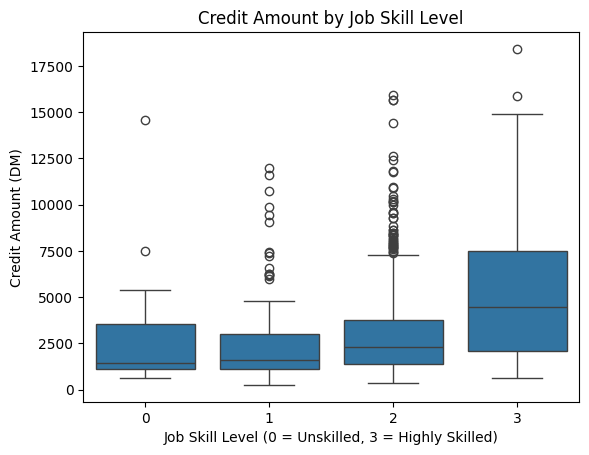

In [53]:
sns.boxplot(x="Job", y="Credit amount", data=gc_df)
plt.title("Credit Amount by Job Skill Level")
plt.xlabel("Job Skill Level (0 = Unskilled, 3 = Highly Skilled)")
plt.ylabel("Credit Amount (DM)")
plt.show()


Insight: We know that the job classifications go by: (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled). From the boxplot, the first three job levels show fairly similar credit amount distributions, although higher skill levels tend to have larger outliers. In contrast, the highly skilled group has a noticeably higher overall credit amount distribution compared to the others. This suggests that individuals in more skilled jobs generally receive larger loans, which aligns with expectations since higher-skilled jobs are often associated with greater income stability and borrowing capacity.

### 5. r5

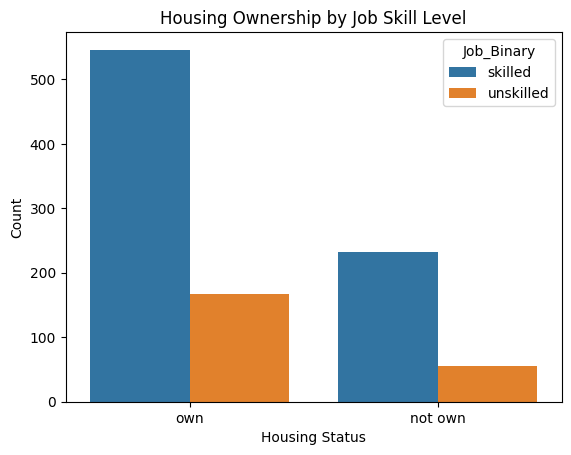

In [ ]:
gc_df["Housing_Binary"] = gc_df["Housing"]
gc_df.loc[gc_df["Housing"] != "own", "Housing_Binary"] = "not own"

gc_df["Job_Binary"] = "skilled"
gc_df.loc[gc_df["Job"].isin([0, 1]), "Job_Binary"] = "unskilled"

sns.countplot(
    x="Housing_Binary",
    hue="Job_Binary",
    data=gc_df
)

plt.title("Housing Ownership by Job Skill Level")
plt.xlabel("Housing Status")
plt.ylabel("Count")
plt.show()


Insight: This countplot shows an expected outcome of skilled workers being homeowners more frequently, while unskilled workers are more commonly in the non-ownership category. This shows a strong correlation between skilled jobs and owning their house, which is as expected, which can definitely be used to assess the credit risk of a potential customer.

### 6. Countplot of Saving Accounts vs. Housing (r6)

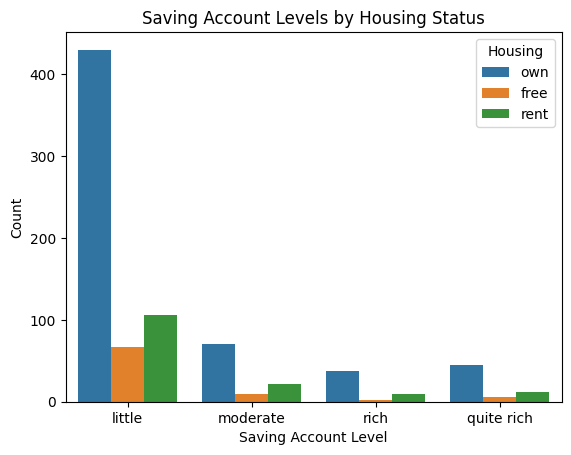

In [62]:
saving_order = ["little", "moderate", "rich", "quite rich"]

sns.countplot(
    x="Saving accounts",
    hue="Housing",
    data=gc_df,
    order= saving_order
)

plt.title("Saving Account Levels by Housing Status")
plt.xlabel("Saving Account Level")
plt.ylabel("Count")
plt.show()


Insight: Had to order it properly from little to quite rich. However, this is very surprising, I did not expect people so many with little in their saving accounts to own their own place. I thought maybe that could be because so many people just bought their places, as we know that the general population is 30-40, but that cant apply to 1000 people right? Maybe it's because my perception of owning a place is skewed by the housing prices in Canada, but I don't think housing status affects the credit risk in this case, since most own. However, as expected the highest amount of people renting and living for free is with the people who have little in their saving accoun, and it basically decreases the richer people get, balancing out between the rich, and the quite rich. 

### 7. Countplot of Purpose Distribution vs. Duration Bins (r7)

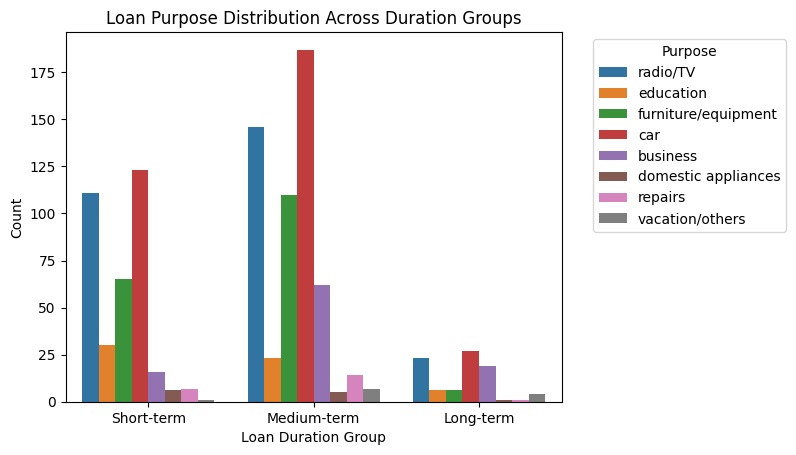

In [54]:
# bin loan duration (months)
gc_df["Duration_Group"] = pd.cut(
    gc_df["Duration"],
    bins=[0, 12, 36, float("inf")],
    labels=["Short-term", "Medium-term", "Long-term"]
)

sns.countplot(x="Duration_Group", hue="Purpose", data=gc_df)
plt.title("Loan Purpose Distribution Across Duration Groups")
plt.xlabel("Loan Duration Group")
plt.ylabel("Count")
plt.legend(title="Purpose", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Insight: Surprisingly the purpose of "car" and "radio/TV" dominate across all categories of loans, even long term. It seems like having a car and radio/TV is just that important to this sample set of customers. I'

### 8. Scatterplot of Credit Amount vs. Duration (r8)

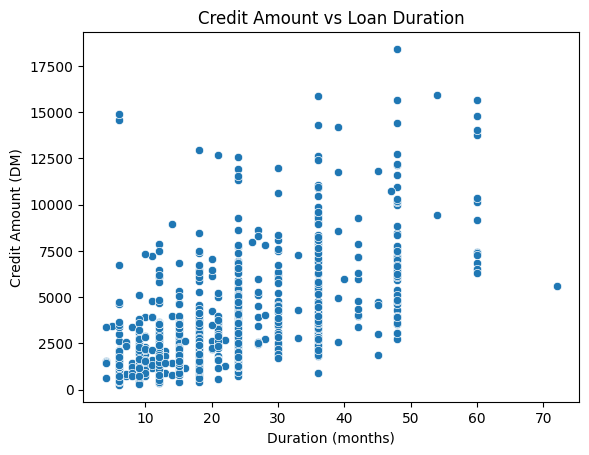

In [55]:
sns.scatterplot(x="Duration", y="Credit amount", data=gc_df)
plt.title("Credit Amount vs Loan Duration")
plt.xlabel("Duration (months)")
plt.ylabel("Credit Amount (DM)")
plt.show()

Insight: We can see that the credit amount roughly scales up with the duration, which is as expected.

### 9. Countplot of Sex vs. Saving Account Levels 

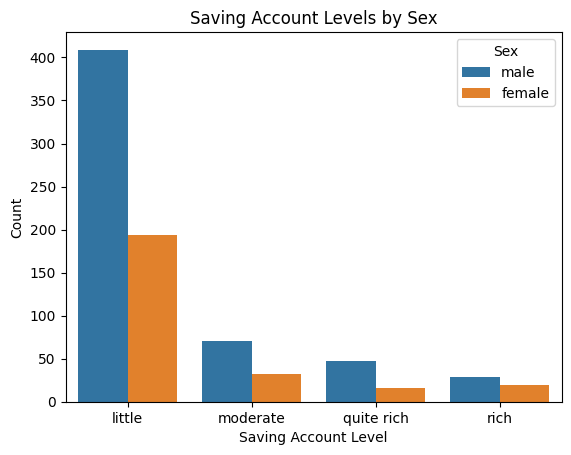

In [56]:
order = ["little", "moderate", "quite rich", "rich"]

sns.countplot(
    x="Saving accounts",
    hue="Sex",
    data=gc_df,
    order=order
)
plt.title("Saving Account Levels by Sex")
plt.xlabel("Saving Account Level")
plt.ylabel("Count")
plt.show()


Insight: I wanted to check for if the sample size is biased, and it appears it is. At first it looks like men are more poor, but then you realize it's at every tier, which would indicate that there are simply more men in general in this dataset. To check this, I will standardize it to per 100 people.

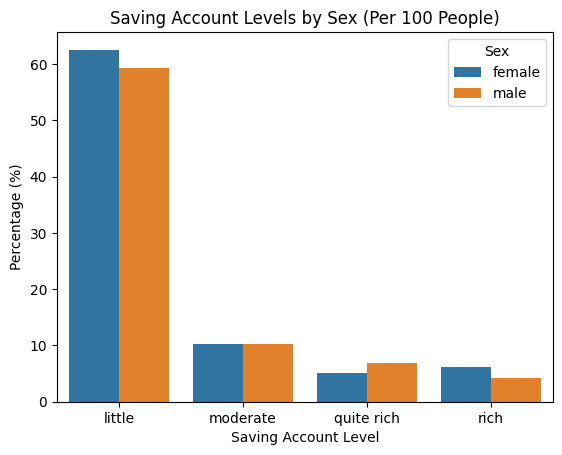

In [57]:
# count ppl per (Sex, Saving accounts)
counts = gc_df.groupby(["Sex", "Saving accounts"]).size().reset_index(name="Count")

# total ppl per sex
sex_totals = gc_df.groupby("Sex").size().reset_index(name="Total")

# merge totals and calculate percentage
counts = counts.merge(sex_totals, on="Sex")
counts["Percentage"] = (counts["Count"] / counts["Total"]) * 100

sns.barplot(
    x="Saving accounts",
    y="Percentage",
    hue="Sex",
    data=counts,
    order=order
)

plt.title("Saving Account Levels by Sex (Per 100 People)")
plt.xlabel("Saving Account Level")
plt.ylabel("Percentage (%)")
plt.show()


Insight: As we standardize it, we can see that there is basically no different in saving account levels once standardized to the same sample size. There is negligible difference between males and females in terms of their saving accounts levels per 100 in this dataset, meaning there should be no bias in assessing their credit risk when taking this attribute into account.

### 10. Boxplot of Loan Duration vs. Checking Account Balance

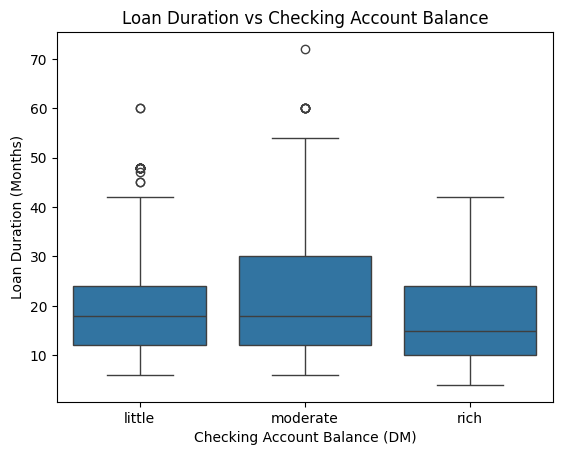

In [58]:
sns.boxplot(
    x="Checking account",
    y="Duration",
    data=gc_df
)
plt.title("Loan Duration vs Checking Account Balance")
plt.xlabel("Checking Account Balance (DM)")
plt.ylabel("Loan Duration (Months)")
plt.show()


Insight: This boxplot actaully defies expectations a little, as I would've expected rich people to pay off their loans much faster, rather than that small amount on the boxplot. Then again they kind of do meet that expectation, because there are no outliers, unlike with the people with little to moderate amounts in their checking accounts. It's just surprising that people with little and moderate amounts have roughly the same duration for their loans. Seems like we can generally say that the duration is not really affected by the amount in a person's checking account, unless we are talking about the likelihood of outliers, which seems to increase the less they have in their checking account.